<a href="https://colab.research.google.com/github/databyhuseyn/DeepLearning/blob/main/Bone_Fracture_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [20]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [21]:
!kaggle datasets download -d bmadushanirodrigo/fracture-multi-region-x-ray-data

Dataset URL: https://www.kaggle.com/datasets/bmadushanirodrigo/fracture-multi-region-x-ray-data
License(s): ODC Public Domain Dedication and Licence (PDDL)
fracture-multi-region-x-ray-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [22]:
!wget https://raw.githubusercontent.com/databyhuseyn/DeepLearning/main/helper_functions.py

--2024-05-12 19:10:46--  https://raw.githubusercontent.com/databyhuseyn/DeepLearning/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.003s  

2024-05-12 19:10:46 (3.82 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [23]:
from helper_functions import unzip_data, walk_through_dir, plot_loss_curves

In [24]:
unzip_data('/content/fracture-multi-region-x-ray-data.zip')

In [25]:
walk_through_dir('/content/Bone_Fracture_Binary_Classification')

There are 1 directories and 0 images in '/content/Bone_Fracture_Binary_Classification'.
There are 3 directories and 0 images in '/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification'.
There are 2 directories and 0 images in '/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train'.
There are 0 directories and 4606 images in '/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/fractured'.
There are 0 directories and 4640 images in '/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured'.
There are 2 directories and 0 images in '/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test'.
There are 0 directories and 238 images in '/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test/fractured'.
There are 0 directories and 268 images in '/content/Bone_Fracture_Binary_Classification/Bone_Fract

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_aug = ImageDataGenerator(rescale = 1/255.,
                                    rotation_range=0.2,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    vertical_flip=True)
test_data_aug = ImageDataGenerator(rescale = 1/255.)

In [27]:
train_dir = '/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train'
test_dir = '/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test'

In [69]:
train_aug = train_data_aug.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)
test_aug = test_data_aug.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 9246 images belonging to 2 classes.
Found 506 images belonging to 2 classes.


In [70]:
import tensorflow as tf

In [71]:
tf.keras.backend.clear_session()
model_0 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(224,224, 3),
                           filters=32,
                           kernel_size=(3, 3),
                           padding='valid',
                           activation='relu',
                           kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=(3, 3),
                           padding='valid',
                           activation='relu',
                           kernel_initializer='he_normal'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=(3, 3),
                           padding='valid',
                           activation='relu',
                           kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=(3, 3),
                           padding='valid',
                           activation='relu',
                           kernel_initializer='he_normal'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [33]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 32)      9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 32)        0         
 g2D)                                                   

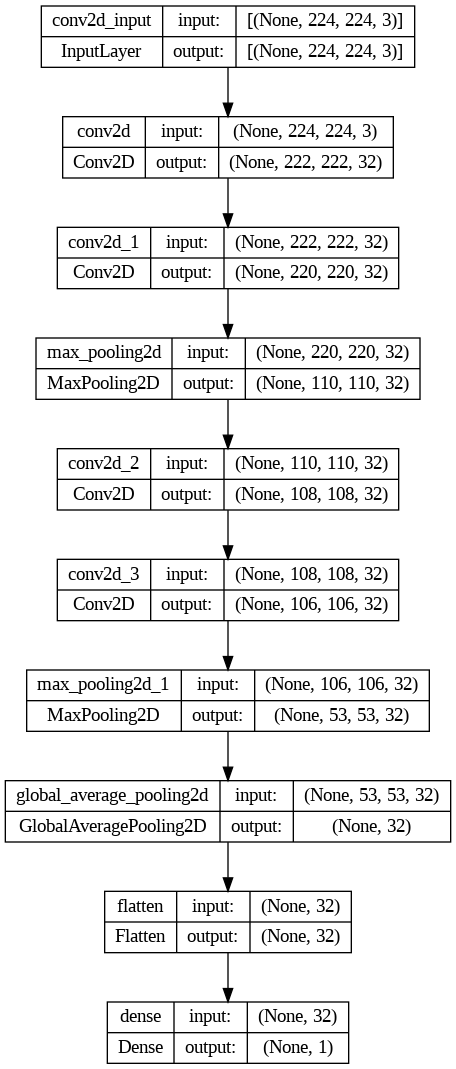

In [44]:
from tensorflow.keras.utils import plot_model

# Plot the model architecture
plot_model(model_0, to_file='model.png', show_shapes=True, show_layer_names=True)


In [72]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_0.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [73]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [74]:
history = model_0.fit(train_aug,
                      epochs=5,
                      steps_per_epoch=len(train_aug),
                      validation_data=test_aug,
                      validation_steps=len(test_aug))

Epoch 1/5
289/289 [==============================] - 136s 466ms/step - loss: 0.6937 - accuracy: 0.5157 - val_loss: 0.6932 - val_accuracy: 0.5356
Epoch 2/5
289/289 [==============================] - 135s 468ms/step - loss: 0.6750 - accuracy: 0.5634 - val_loss: 0.6896 - val_accuracy: 0.6206
Epoch 3/5
289/289 [==============================] - 130s 451ms/step - loss: 0.6479 - accuracy: 0.6152 - val_loss: 0.6952 - val_accuracy: 0.6008
Epoch 4/5
289/289 [==============================] - 131s 454ms/step - loss: 0.6478 - accuracy: 0.6148 - val_loss: 0.7278 - val_accuracy: 0.5593
Epoch 5/5
289/289 [==============================] - 131s 452ms/step - loss: 0.6261 - accuracy: 0.6434 - val_loss: 0.7259 - val_accuracy: 0.6067


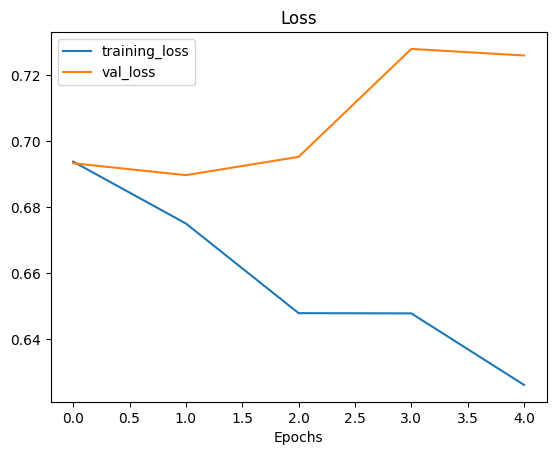

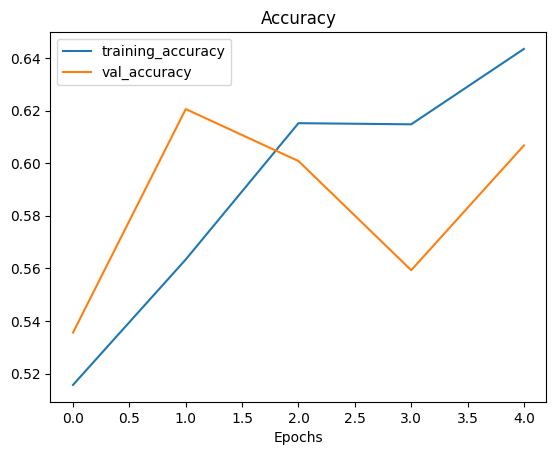

In [75]:
plot_loss_curves(history)

# Model with SeparableConv2D

In [98]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.SeparableConv2D(filters=32,
                                    input_shape=(224,224,3),
                                    kernel_size=(4, 4),
                                    strides=(2),
                                    padding='valid',
                                    activation='relu',
                                    kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.SeparableConv2D(filters=32,
                                    kernel_size=(4, 4),
                                    strides=(2),
                                    padding='valid',
                                    activation='relu',
                                    kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.SeparableConv2D(filters=32,
                                    kernel_size=(4, 4),
                                    strides=(2),
                                    padding='valid',
                                    activation='relu',
                                    kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.SeparableConv2D(filters=32,
                                    kernel_size=(4, 4),
                                    strides=(2),
                                    padding='valid',
                                    activation='relu',
                                    kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

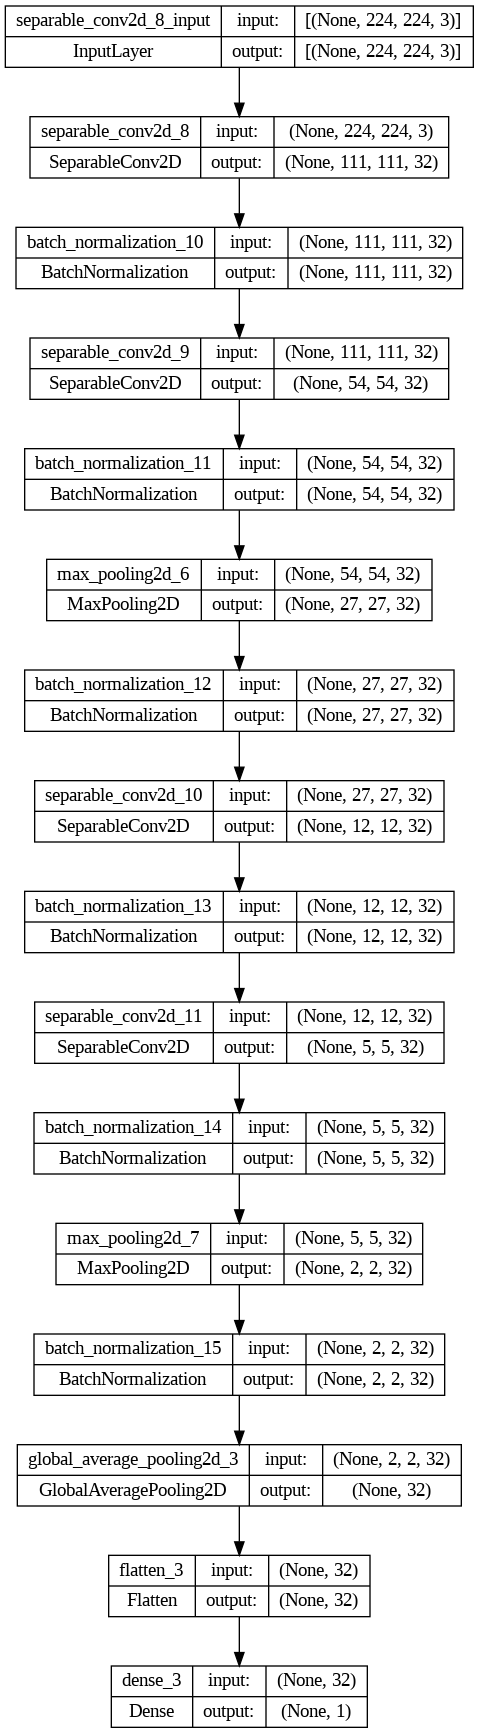

In [124]:
plot_model(model_1, to_file='model.png', show_shapes=True, show_layer_names=True)


In [99]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model_1.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [100]:
history_1 = model_1.fit(train_aug,
                        epochs=5,
                        steps_per_epoch=len(train_aug),
                        validation_data=test_aug,
                        validation_steps=len(test_aug))

Epoch 1/5
289/289 [==============================] - 137s 457ms/step - loss: 0.6258 - accuracy: 0.6457 - val_loss: 0.6992 - val_accuracy: 0.4625
Epoch 2/5
289/289 [==============================] - 121s 419ms/step - loss: 0.5642 - accuracy: 0.7095 - val_loss: 0.7120 - val_accuracy: 0.5929
Epoch 3/5
289/289 [==============================] - 121s 417ms/step - loss: 0.5316 - accuracy: 0.7418 - val_loss: 1.1814 - val_accuracy: 0.5158
Epoch 4/5
289/289 [==============================] - 123s 425ms/step - loss: 0.4969 - accuracy: 0.7601 - val_loss: 1.2342 - val_accuracy: 0.5059
Epoch 5/5
289/289 [==============================] - 123s 424ms/step - loss: 0.4706 - accuracy: 0.7761 - val_loss: 0.7049 - val_accuracy: 0.6383


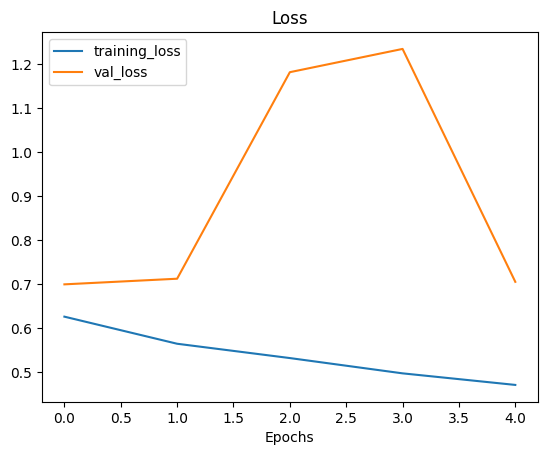

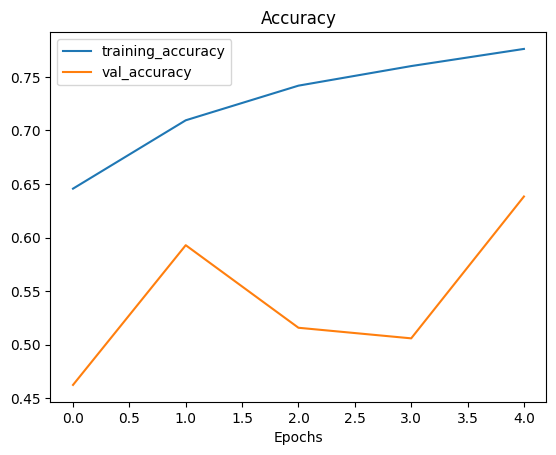

In [101]:
plot_loss_curves(history_1)

In [106]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.SeparableConv2D(filters=32,
                                    input_shape=(224,224,3),
                                    kernel_size=(4, 4),
                                    strides=(2),
                                    padding='valid',
                                    activation='relu',
                                    kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.SeparableConv2D(filters=32,
                                    kernel_size=(4, 4),
                                    strides=(2),
                                    padding='valid',
                                    activation='relu',
                                    kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.SeparableConv2D(filters=32,
                                    kernel_size=(4, 4),
                                    strides=(2),
                                    padding='valid',
                                    activation='relu',
                                    kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.SeparableConv2D(filters=32,
                                    kernel_size=(4, 4),
                                    strides=(2),
                                    padding='valid',
                                    activation='relu',
                                    kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

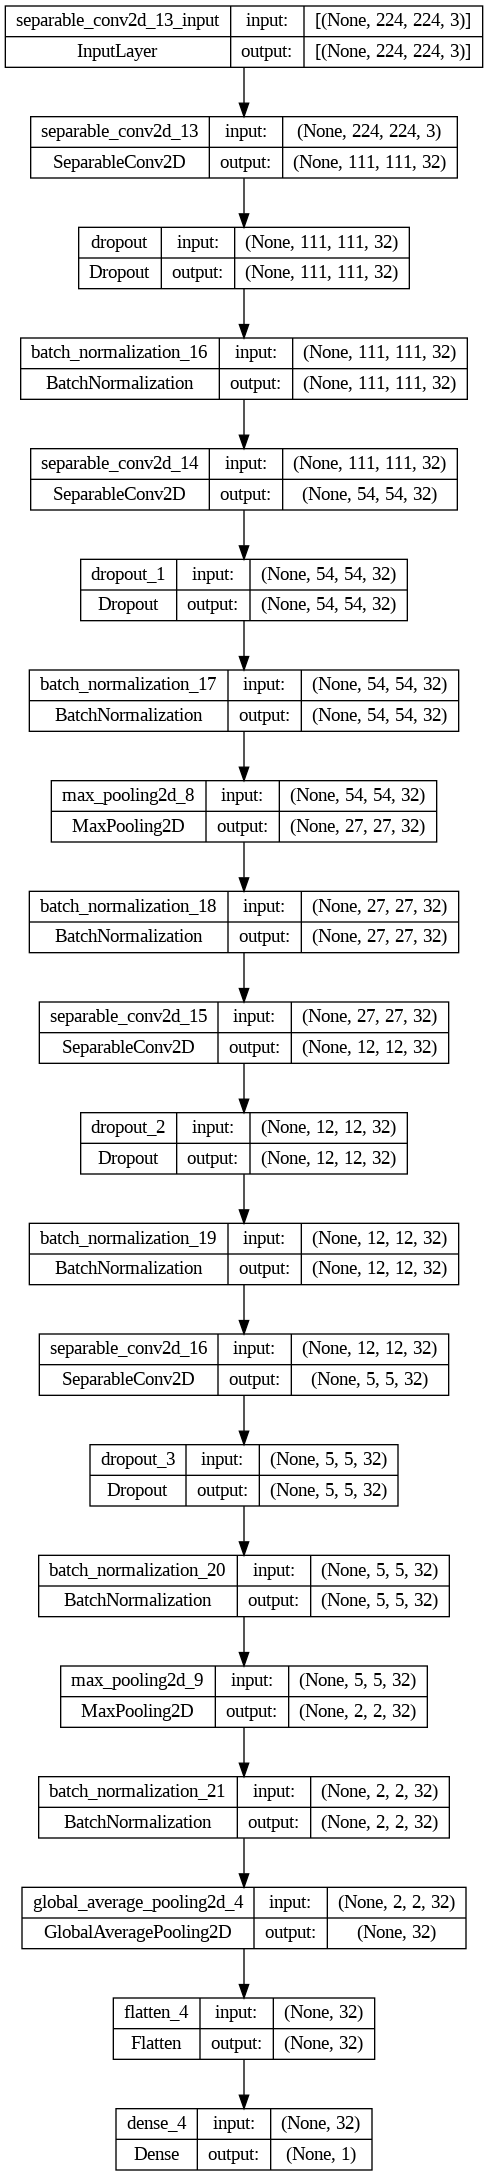

In [125]:
plot_model(model_2, to_file='model.png', show_shapes=True, show_layer_names=True)


In [109]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_2.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [122]:
history_2 = model_2.fit(train_aug,
                        epochs=5,
                        steps_per_epoch=len(train_aug),
                        validation_data=test_aug,
                        validation_steps=len(test_aug))

Epoch 1/5
289/289 [==============================] - 131s 453ms/step - loss: 0.5176 - accuracy: 0.7446 - val_loss: 0.6725 - val_accuracy: 0.6344
Epoch 2/5
289/289 [==============================] - 127s 438ms/step - loss: 0.4985 - accuracy: 0.7623 - val_loss: 0.9419 - val_accuracy: 0.5553
Epoch 3/5
289/289 [==============================] - 126s 437ms/step - loss: 0.4803 - accuracy: 0.7692 - val_loss: 0.6209 - val_accuracy: 0.6719
Epoch 4/5
289/289 [==============================] - 125s 432ms/step - loss: 0.4602 - accuracy: 0.7875 - val_loss: 0.6078 - val_accuracy: 0.6581
Epoch 5/5
289/289 [==============================] - 125s 432ms/step - loss: 0.4463 - accuracy: 0.7936 - val_loss: 0.8308 - val_accuracy: 0.5553


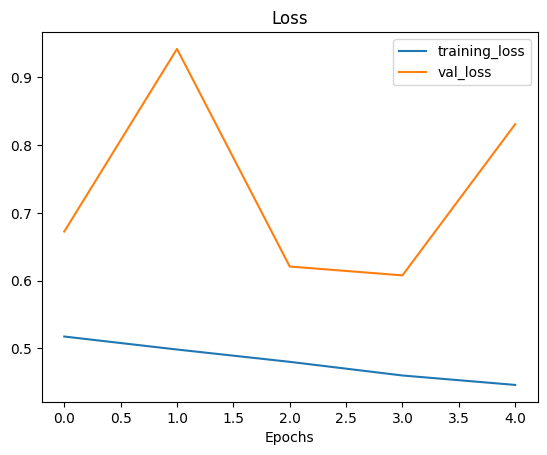

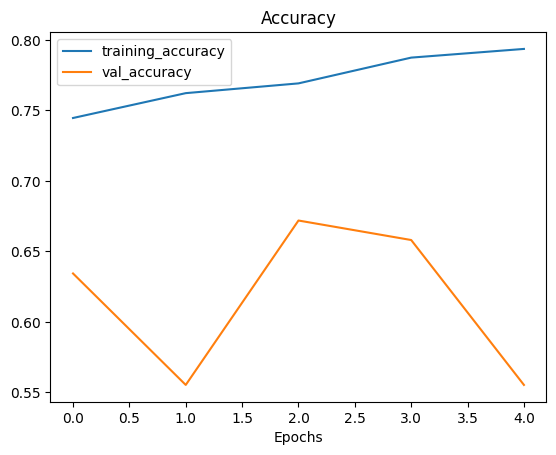

In [123]:
plot_loss_curves(history_2)

In [111]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.SeparableConv2D(filters=32,
                                    input_shape=(224,224,3),
                                    kernel_size=(4, 4),
                                    strides=(2),
                                    padding='valid',
                                    activation='relu',
                                    kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.SeparableConv2D(filters=32,
                                    kernel_size=(4, 4),
                                    strides=(2),
                                    padding='valid',
                                    activation='relu',
                                    kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.SeparableConv2D(filters=32,
                                    kernel_size=(4, 4),
                                    strides=(2),
                                    padding='valid',
                                    activation='relu',
                                    kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.SeparableConv2D(filters=32,
                                    kernel_size=(4, 4),
                                    strides=(2),
                                    padding='valid',
                                    activation='relu',
                                    kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

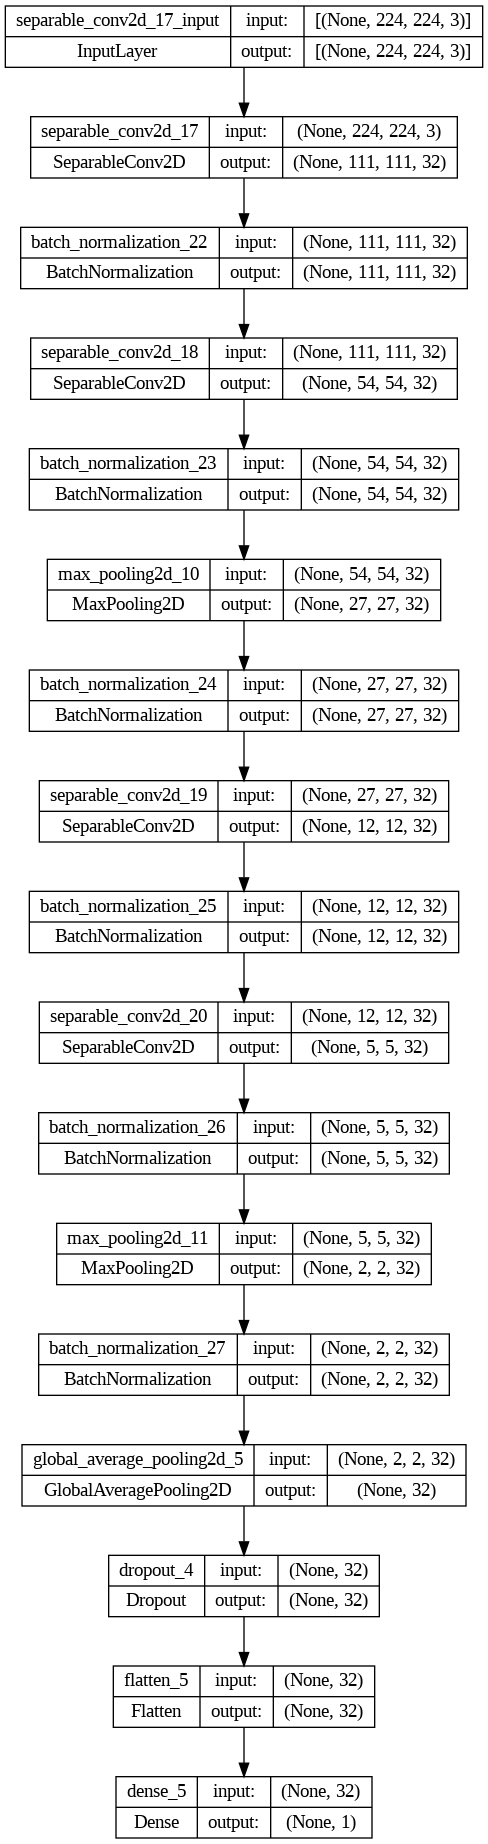

In [126]:
plot_model(model_3, to_file='model.png', show_shapes=True, show_layer_names=True)


In [112]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_3.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [128]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('MyCheckpoint',
                                                   save_weights_only=True,)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(restore_best_weights=True,
                                                     patience=1)

In [129]:
history_3 = model_3.fit(train_aug,
                        epochs=5,
                        steps_per_epoch=len(train_aug),
                        validation_data=test_aug,
                        validation_steps=len(test_aug),
                        callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/5
289/289 [==============================] - 122s 422ms/step - loss: 0.4819 - accuracy: 0.7658 - val_loss: 0.7665 - val_accuracy: 0.6107
Epoch 2/5
289/289 [==============================] - 122s 422ms/step - loss: 0.4616 - accuracy: 0.7783 - val_loss: 0.9164 - val_accuracy: 0.6245


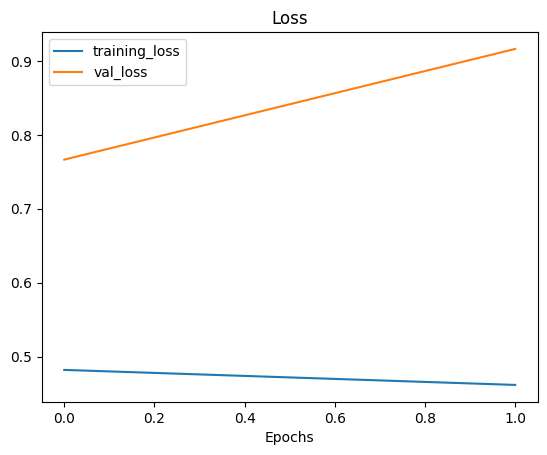

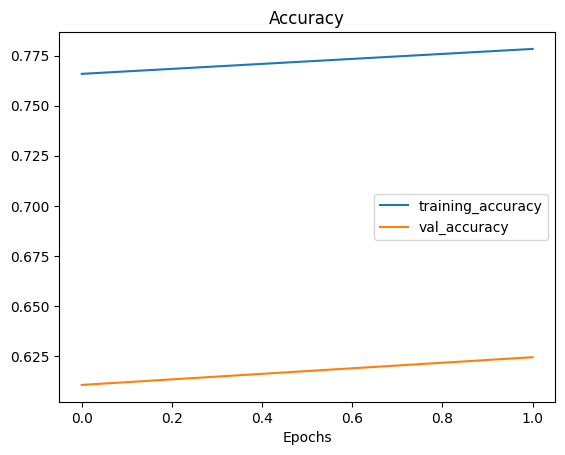

In [130]:
plot_loss_curves(history_3)

# Transfer learning

In [90]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

24274472/24274472 [==============================] - 0s 0us/step


In [91]:
base_model.trainable = False

In [94]:
for layer in base_model.layers[-10:]:
  layer.trainable = True

In [97]:
for layer in base_model.layers:
  print(layer.name, layer.trainable)

input_2 False
rescaling False
normalization False
stem_conv False
stem_bn False
stem_activation False
block1a_project_conv False
block1a_project_bn False
block1a_project_activation False
block2a_expand_conv False
block2a_expand_bn False
block2a_expand_activation False
block2a_project_conv False
block2a_project_bn False
block2b_expand_conv False
block2b_expand_bn False
block2b_expand_activation False
block2b_project_conv False
block2b_project_bn False
block2b_drop False
block2b_add False
block3a_expand_conv False
block3a_expand_bn False
block3a_expand_activation False
block3a_project_conv False
block3a_project_bn False
block3b_expand_conv False
block3b_expand_bn False
block3b_expand_activation False
block3b_project_conv False
block3b_project_bn False
block3b_drop False
block3b_add False
block4a_expand_conv False
block4a_expand_bn False
block4a_expand_activation False
block4a_dwconv2 False
block4a_bn False
block4a_activation False
block4a_se_squeeze False
block4a_se_reshape False
block4a

In [117]:
inputs = tf.keras.layers.Input(shape=(224,224,3), name='input_layer')
x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='output_layer')(x)
model_4 = tf.keras.Model(inputs, outputs)

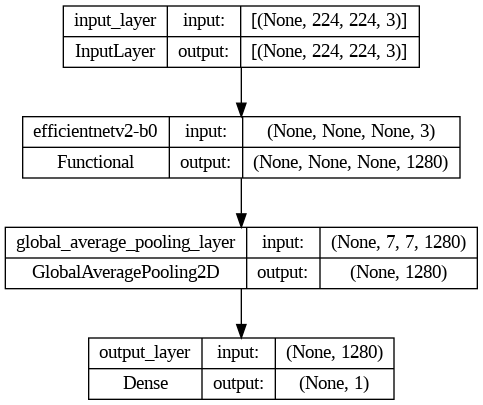

In [127]:
plot_model(model_4, to_file='model.png', show_shapes=True, show_layer_names=True)

In [119]:
optimizer= tf.keras.optimizers.Adam(learning_rate=1e-3)
model_4.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [120]:
history_4 = model_4.fit(train_aug,
                        epochs=5,
                        steps_per_epoch=len(train_aug),
                        validation_data=test_aug,
                        validation_steps=len(test_aug))

Epoch 1/5
289/289 [==============================] - 152s 494ms/step - loss: 0.6962 - accuracy: 0.5123 - val_loss: 0.6882 - val_accuracy: 0.5336
Epoch 2/5
289/289 [==============================] - 129s 446ms/step - loss: 0.6939 - accuracy: 0.5228 - val_loss: 0.6947 - val_accuracy: 0.4704
Epoch 3/5
289/289 [==============================] - 129s 444ms/step - loss: 0.6942 - accuracy: 0.5247 - val_loss: 0.6867 - val_accuracy: 0.5731
Epoch 4/5
289/289 [==============================] - 131s 453ms/step - loss: 0.6913 - accuracy: 0.5347 - val_loss: 0.6870 - val_accuracy: 0.6383
Epoch 5/5
289/289 [==============================] - 135s 467ms/step - loss: 0.6855 - accuracy: 0.5525 - val_loss: 0.6877 - val_accuracy: 0.5198


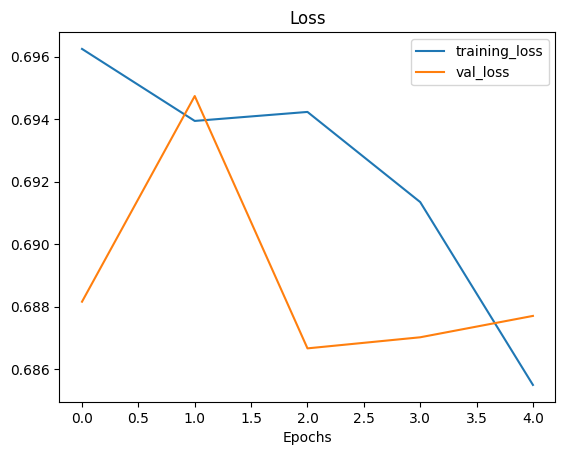

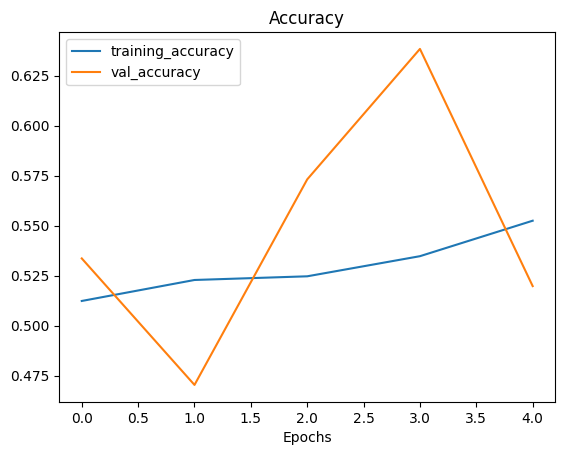

In [121]:
plot_loss_curves(history_4)